# Sinkhorn's Algorithm for Unbalanced Optimal Transport

This toolbox showcase the use of Sinkhorn's algorithm to solve unbalanced versions of OT and OT-barycenters. 

In [8]:
addpath('toolbox/');

## Balanced OT

Number of points.

In [4]:
N = 200;

Samples points in a square for the first distribution

In [6]:
x = rand(2,N)-.5;

Samples points in an annulus for the first distribution        

In [7]:
theta = 2*pi*rand(1,N);
r = .8 + .2*rand(1,N);
y = [cos(theta).*r; sin(theta).*r];

Both distributions are uniform.

In [8]:
mu = ones(N,1)/N;
nu = ones(N,1)/N;

OT cost: squared Euclidean distance.

In [9]:
x2 = sum(x.^2,1); y2 = sum(y.^2,1);
c = repmat(y2,N,1)+repmat(x2.',1,N)-2*x.'*y;

In [ ]:
Display the distributions.

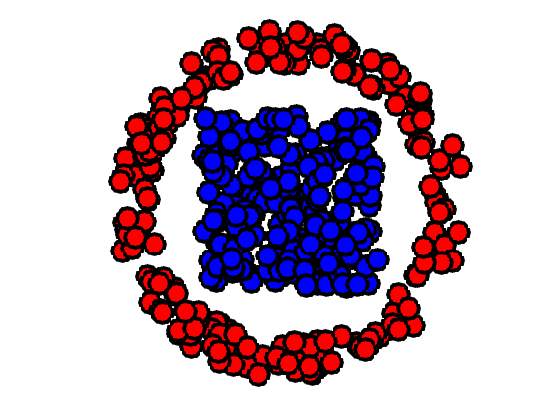

In [10]:
plotp = @(x,col)plot(x(1,:)', x(2,:)', 'o', 'MarkerSize', 10, 'MarkerEdgeColor', 'k', 'MarkerFaceColor', col, 'LineWidth', 2);
clf; hold on;
plotp(x, 'b');
plotp(y, 'r');
axis('off'); axis('equal');

Parameters for Sinkhorn.

In [11]:
epsilon = .5*(.1)^2; % regularization
options.niter = 500; % number of iterations
options.verb = 0;
options.rho = Inf; % used balanced transport

First run classical Sinkhorn, i.e. using $\tau=0$.

In [18]:
options.tau = 0;
[u,v,gamma,Wprimal,Wdual,err(:,1)] = sinkhorn_log(mu,nu,c,epsilon,options);

Run accelerate Sinkhorn, i.e. using $\tau<0$.

In [20]:
options.tau = -.8;
[u,v,gamma,Wprimal,Wdual,err(:,2)] = sinkhorn_log(mu,nu,c,epsilon,options);

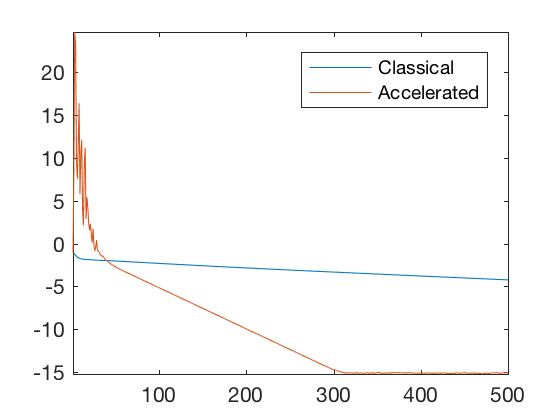

In [22]:
plot(log10(err));
axis tight;
legend('Classical', 'Accelerated');

## Unbalanced OT barycenters

Number of discretization points

In [1]:
N = 150; 

In [2]:
x = (0:N-1)'/N;
normalize = @(x)x/sum(x(:));
gauss = @(m,s)exp(-(x-m).^2/(2*s^2));

Generate mixtures of Gaussians.

In [3]:
sigma = .03;
mu = {...
    1.7*gauss(.1,sigma) + 0.6*gauss(.7,sigma), ...
    gauss(.25,sigma)  + gauss(.9,sigma), ...
   };
vmin = 1e-3;
for k=1:2
    mu{k} =  normalize( vmin + mu{k} );
end

Display them.

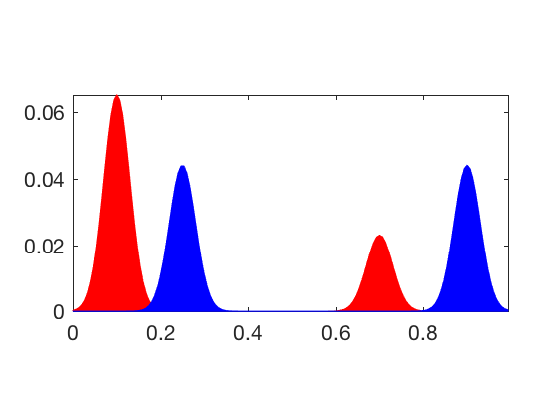

In [23]:
myplot = @(x,y,c,a)area(x, y, 'FaceColor', c, 'EdgeColor', c, 'FaceAlpha', a, 'EdgeAlpha', a);
SetAR = @(ar)set(gca, 'PlotBoxAspectRatio', [1 ar 1]);
clf; hold on;
myplot(x,mu{1}, 'r',1);
myplot(x,mu{2}, 'b',1);
axis tight; box on;
SetAR(1/2);

OT cost

In [5]:
[Y,X] = meshgrid(x,x);
c = (X-Y).^2;

Barycenter parameters

In [13]:
epsilon = (.02).^2;
options.niter = 4000;
options.verb = 0;
options.tau = 0;
options.tau_v = 0;
options.disp_rate = NaN;

First test balanced OT

In [18]:
options.rho = Inf; 

In [14]:
K=5; 
nu = {};
for k=1:K
    t = (k-1)/(K-1);
    w = [1-t t];
    nu{k} = barycenter_log(mu,c,epsilon,w,options);  
end

Display.

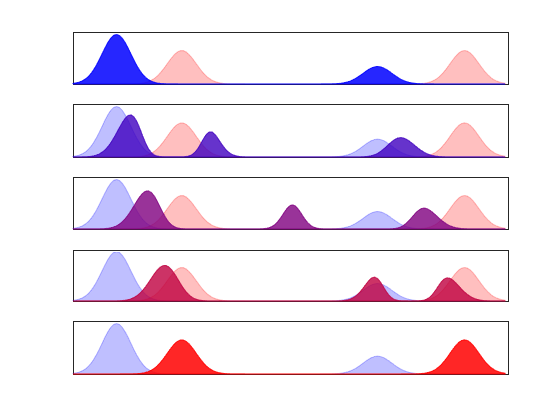

In [16]:
clf;
for k=1:K
    t = (k-1)/(K-1);
    subplot(K,1,k);
    hold on;
    h = myplot(x, nu{1}, 'b', .25); alpha(h,.25);
    h = myplot(x, nu{end}, 'r', .25); alpha(h,.25);
    h = myplot(x, nu{k}, [t 0 1-t], .8); alpha(h,.8);
    axis([0 1 0 1.05*max([nu{1}(:);nu{end}(:)])]);
    set(gca, 'XTick', [], 'YTick', []); 
    box on;
    drawnow;  
end

Now test with unbalanced OT

In [20]:
options.rho = .3; 

In [21]:
K=5; 
nu = {};
for k=1:K
    t = (k-1)/(K-1);
    w = [1-t t];
    nu{k} = barycenter_log(mu,c,epsilon,w,options);  
end

Display.

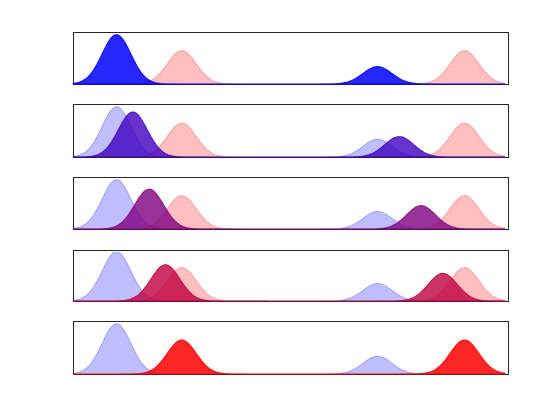

In [22]:
clf;
for k=1:K
    t = (k-1)/(K-1);
    subplot(K,1,k);
    hold on;
    h = myplot(x, nu{1}, 'b', .25); alpha(h,.25);
    h = myplot(x, nu{end}, 'r', .25); alpha(h,.25);
    h = myplot(x, nu{k}, [t 0 1-t], .8); alpha(h,.8);
    axis([0 1 0 1.05*max([nu{1}(:);nu{end}(:)])]);
    set(gca, 'XTick', [], 'YTick', []); 
    box on;
    drawnow;  
end